In [43]:
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.graph_objects import *
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

In [44]:
df_0 = pd.read_csv('Mall_Customers.csv')

In [45]:
df_0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [46]:
df=df_0.loc[:, df_0.columns != 'CustomerID']

In [47]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [48]:
df.isnull().sum() #NULL

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [49]:
df.dtypes #перевірка на тип данних

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [50]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1}) #замінюємо значення 'Male', 'Female' на 0 та 1

C:\Users\Dinamicka Laptop\AppData\Local\Temp\ipykernel_29272\2341486166.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



--ще один варіант, що замінити дані
df['Gender']=df['Gender'].replace(['Male','Female'],[0,1])

In [51]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [52]:
df.dtypes

Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [53]:
corr=df.corr() #високої кореляції немає
corr

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.058109,-0.327227,0.009903,1.000000


In [54]:
df.duplicated().sum() #Перевірка на дубікати

0

In [55]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.560000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,1.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [190]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df,test_size=0.3)

In [191]:
#Зробити стандартизацію
from sklearn.preprocessing import StandardScaler

In [192]:
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [193]:
x_train_std=pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_train_std.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,1.400000e+02,1.400000e+02,1.400000e+02,1.400000e+02
mean,3.806479e-17,1.395709e-16,8.326673e-17,1.141944e-16
std,1.003591e+00,1.003591e+00,1.003591e+00,1.003591e+00
min,-1.206706e+00,-1.483341e+00,-1.708921e+00,-1.835139e+00
25%,-1.206706e+00,-6.942184e-01,-7.665594e-01,-6.918289e-01
50%,8.287020e-01,-2.354260e-01,-8.974868e-03,-1.327887e-02
75%,8.287020e-01,7.188621e-01,5.823106e-01,8.418801e-01
max,8.287020e-01,2.260404e+00,2.762676e+00,1.808582e+00


In [194]:
x_test_std=pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_test_std.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,60.000000,60.000000,60.000000,60.000000
mean,-0.222926,0.157300,-0.207302,-0.019476
std,1.025722,1.075194,0.879853,0.858022
min,-1.206706,-1.409934,-1.745876,-1.760778
25%,-1.206706,-0.694218,-0.711126,-0.394382
50%,-1.206706,0.021498,-0.193752,-0.013279
75%,0.828702,0.828972,0.397534,0.553729
max,0.828702,2.333811,2.356167,1.659858


In [195]:
#Kmeans
from sklearn.cluster import KMeans

In [196]:
clusters=np.linspace(2,10,9)
inertia = list()

for n_clusters in clusters:
    mod = KMeans(n_clusters=int(n_clusters))
    mod.fit(x_train_std) #(x_train)
    inertia.append(mod.inertia_)

In [197]:
mod.cluster_centers_

array([[ 0.82870199, -0.43117742,  0.83894489,  1.18890113],
       [-1.20670641,  1.27134464, -0.48355924, -0.48684516],
       [ 0.82870199,  0.19767396, -1.32088946, -1.00972497],
       [-1.20670641, -1.05984057, -0.64574381,  0.47293192],
       [ 0.82870199,  0.59040021,  1.21671059, -1.08222757],
       [-1.20670641,  0.00173434,  0.99450476, -1.43187033],
       [ 0.82870199, -0.86272028, -1.34272671,  1.0987658 ],
       [ 0.82870199,  1.2589262 , -0.40228528, -0.02124619],
       [-1.20670641, -0.38223957,  0.95802321,  1.19509794],
       [ 0.82870199, -0.84714914, -0.16295545, -0.15167416]])

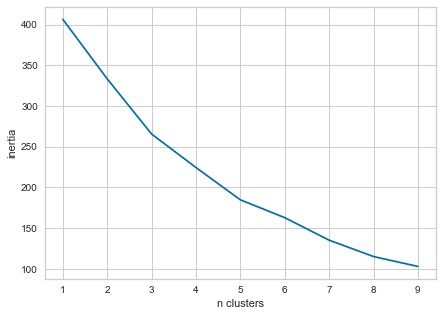

In [198]:
plt.figure(figsize=(7,5))
plt.plot(inertia)
plt.xlabel('n clusters')
plt.ylabel('inertia')
plt.xticks(np.arange(0, 9), np.arange(1, 10));
#px.line(x=clusters,y=inertia) тут нам підходить 3,4,6

([<matplotlib.axis.XTick at 0x21de3f26a60>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9')])

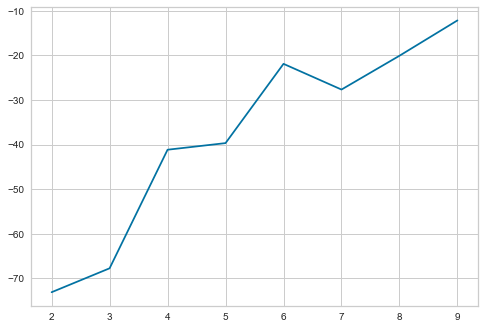

In [199]:
#шукаємо різницю між кластерами
diff=np.diff(inertia)

plt.plot(diff)
plt.xticks(np.arange(0,8),np.arange(2,10))

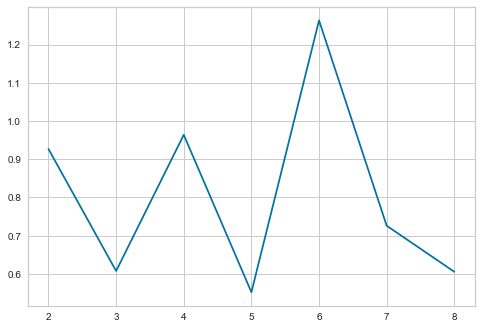

In [200]:
diff_r = diff[1:] / diff[:-1]

plt.plot(diff_r)
plt.xticks(np.arange(0, 7), np.arange(2, 9));
#найнижче значення у кластері 4, тобто зміна від 3 до 4 важливіша ніж від 5 до 6 

In [201]:
from sklearn.metrics import silhouette_score

In [202]:
clusters=np.linspace(2,10,9)
ss = list()

for n_clusters in clusters:
    mod = KMeans(n_clusters=int(n_clusters))
    mod.fit(x_train_std)
    ss.append(silhouette_score(x_train,mod.labels_))

In [256]:
px.line(x=clusters,y=ss)
#найбільще значення у 6 кластерів, але за попередніх графіків та попередніх розрахунках краще взяти 4

In [204]:
from yellowbrick.cluster import KElbowVisualizer

C:\Users\Dinamicka Laptop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



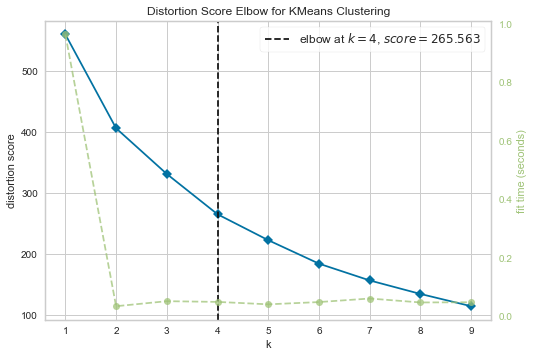

In [205]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,10), timings=True)

visualizer.fit(x_train_std)
visualizer.show();

Враховуючи вище аналізи обераємо 4 кластери

In [234]:
mod=KMeans(n_clusters=4)

In [235]:
x_train_std

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.828702,-0.015206,0.582311,0.953423
1,-1.206706,-0.896087,-0.304618,0.135444
2,0.828702,-0.308833,1.506194,-1.017161
3,0.828702,0.498642,-1.265456,-0.682534
4,-1.206706,-0.015206,0.323623,0.916242
...,...,...,...,...
135,0.828702,2.186998,-0.526350,-0.087641
136,-1.206706,-0.308833,0.582311,1.473954
137,-1.206706,-1.409934,0.434489,-1.500512
138,0.828702,-0.382240,0.877953,1.659858


In [236]:
mod.fit(x_train_std)

KMeans(n_clusters=4)

In [237]:
mod.cluster_centers_

array([[-1.20670641, -0.77286848,  0.24971252,  0.5749749 ],
       [ 0.82870199,  0.73870173, -0.06990124, -0.64032845],
       [-1.20670641,  0.94667619, -0.0051519 , -0.80946135],
       [ 0.82870199, -0.72054905, -0.09252607,  0.67537467]])

In [238]:
#TSME (для візуалізації)
from sklearn.manifold import TSNE

In [239]:
#для побудови графіку
tsne=TSNE(n_components=2)

In [240]:
x_t=tsne.fit_transform(x_train_std)

C:\Users\Dinamicka Laptop\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Dinamicka Laptop\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [241]:
import matplotlib.pyplot as plt

In [242]:
px.scatter(x=x_t[:,0],
          y=x_t[:,1],
           color=mod.labels_)
#по візуалізації дані діляться добре

In [267]:
#средне значення, максимальне значення, 
df_1=pd.DataFrame(x_train)
df_1['y']=pd.DataFrame(mod.labels_)
#df_1['pred_cl']=mod.predict(x_test) #наше передбачення
#df_1['pred_prob']=sigmoid(x_test.dot(mod.coef_.T)+mod.intercept_) #передбачення ймовірності <0,5-група 0; >0,5-група 1


In [268]:
corr=df_1.corr()
corr

,Gender,Age,Annual Income (k$),Spending Score (1-100),y
Gender,1.000000,-0.084517,-0.099481,0.107224,0.007144
Age,-0.084517,1.000000,-0.016239,-0.352285,0.057344
Annual Income (k$),-0.099481,-0.016239,1.000000,-0.017452,-0.027469
Spending Score (1-100),0.107224,-0.352285,-0.017452,1.000000,0.073481
y,0.007144,0.057344,-0.027469,0.073481,1.000000


In [269]:
df_1.loc[df_1['y']==0].mean()

Gender                     0.666667
Age                       36.277778
Annual Income (k$)        49.666667
Spending Score (1-100)    47.000000
y                          0.000000
dtype: float64

In [270]:
df_1.loc[df_1['y']==1].mean() 

Gender                     0.615385
Age                       37.115385
Annual Income (k$)        46.653846
Spending Score (1-100)    49.576923
y                          1.000000
dtype: float64

In [271]:
df_1.loc[df_1['y']==2].mean()

Gender                     0.476190
Age                       43.523810
Annual Income (k$)        46.523810
Spending Score (1-100)    51.095238
y                          2.000000
dtype: float64

In [272]:
df_1.loc[df_1['y']==3].mean()

Gender                     0.689655
Age                       37.620690
Annual Income (k$)        47.689655
Spending Score (1-100)    51.724138
y                          3.000000
dtype: float64

In [249]:
labels=mod.predict(x_test_std)
#для побудови графіку
tsne=TSNE(n_components=2)
x_te=tsne.fit_transform(x_test_std)
labels

C:\Users\Dinamicka Laptop\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Dinamicka Laptop\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



array([2, 1, 2, 1, 2, 0, 0, 3, 1, 0, 1, 0, 2, 3, 0, 3, 0, 0, 1, 0, 2, 1,
       3, 0, 1, 3, 2, 3, 3, 1, 1, 1, 2, 0, 2, 0, 2, 0, 3, 1, 2, 0, 1, 0,
       1, 3, 3, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 2, 3, 0])

In [260]:
px.scatter(x=x_te[:,0],
          y=x_te[:,1],
           color=labels) 
#не ідеально, але при взяті 30 відсотків на вибірку тесту кластеризація показує себе задовільно
#рекомендація розширити вибірку з данних

In [274]:
#ірархічна кластеризація
from scipy.cluster.hierarchy import dendrogram, linkage

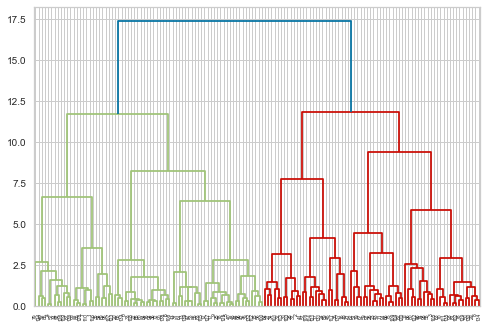

In [275]:
linkage_data = linkage(x_train_std, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()
#на графіку видно, що найоптимальніша кількість кластерів 4